In [12]:
from astropy.io import fits
f = fits.open('/home/songju/specObj-dr17.fits')
len(f[1].data)
vars(f[1].data)
print(f[1].data[15]['Z']) #redshift for 15th object in this file
print(f[1].data[15]['SOURCETYPE']) #tells us if 15th object is galaxy, star, or quasar
print(f[1].data[15]['ZWARNING']) #tells us if there is a warning with this redshift; if yes, we'd exclude it.

0.052658666
GALAXY
0


In [11]:
column_names = f[1].data.columns.names

# Access data for the 15th object
object_data = f[1].data[15]

# Print all category names and their corresponding values for the 15th object
print('Categories and values for the 15th object:')
for category in column_names:
    print(f"{category}: {object_data[category]}")

# Close the FITS file

Categories and values for the 15th object:
SURVEY: sdss
INSTRUMENT: SDSS
CHUNK: chunk4
PROGRAMNAME: legacy
PLATERUN: chunk4
PLATEQUALITY: bad
PLATESN2: 7.67533016204834
DEREDSN2: 0.0
LAMBDA_EFF: 5000.0
BLUEFIBER: -1
ZOFFSET: 0.0
SNTURNOFF: -9999.0
NTURNOFF: -1
SPECPRIMARY: 0
SPECSDSS: 0
SPECLEGACY: 0
SPECSEGUE: 0
SPECSEGUE1: 0
SPECSEGUE2: 0
SPECBOSS: 0
BOSS_SPECOBJ_ID: 0
SPECOBJID:     299493800143775744
FLUXOBJID: 1237648720142401670
BESTOBJID: 1237648720142401670
TARGETOBJID:        284722522357956
PLATEID: 299489402097264640
NSPECOBS: 2
FIRSTRELEASE: dr7
RUN2D: 26
RUN1D: 
DESIGNID: -1
CX: -0.8350277784389807
CY: 0.5499373791887978
CZ: -0.017247846422581516
XFOCAL: 160.98800659179688
YFOCAL: -228.679443359375
SOURCETYPE: GALAXY
TARGETTYPE: SCIENCE
THING_ID_TARGETING: 0
THING_ID: 0
PRIMTARGET: 64
SECTARGET: 0
LEGACY_TARGET1: 64
LEGACY_TARGET2: 0
SPECIAL_TARGET1: 0
SPECIAL_TARGET2: 0
SEGUE1_TARGET1: 0
SEGUE1_TARGET2: 0
SEGUE2_TARGET1: 0
SEGUE2_TARGET2: 0
MARVELS_TARGET1: 0
MARVELS_TARG

In [14]:
import numpy as np
data = f[1].data

# Extract the 'TARGETTYPE' column
target_types = data['TARGETTYPE']

# Find unique values in the 'TARGETTYPE' column
unique_target_types = np.unique(target_types)

# Print the unique values
print('Unique TARGETTYPE values:')
for target_type in unique_target_types:
    print(target_type)

Unique TARGETTYPE values:
SCIENCE
SKY
STANDARD


In [17]:
data = f[1].data

# Extract the 'SPECPRIMARY' column
target_types = data['SPECPRIMARY']

# Find unique values in the 'SPECPRIMARY' column
unique_target_types = np.unique(target_types)

# Print the unique values
print('Unique SPECPRIMARY values:')
for target_type in unique_target_types:
    print(target_type)

Unique SPECPRIMARY values:
0
1


In [18]:
# Apply conditions:
# 'SPECPRIMARY' > 0
# 'ZWARNING' == 0 or 'ZWARNING' == 16
condition = (data['SPECPRIMARY'] > 0) & ((data['ZWARNING'] == 0) | (data['ZWARNING'] == 16))

# Apply the condition to filter the 'Z' values
filtered_z_values = data['Z'][condition]

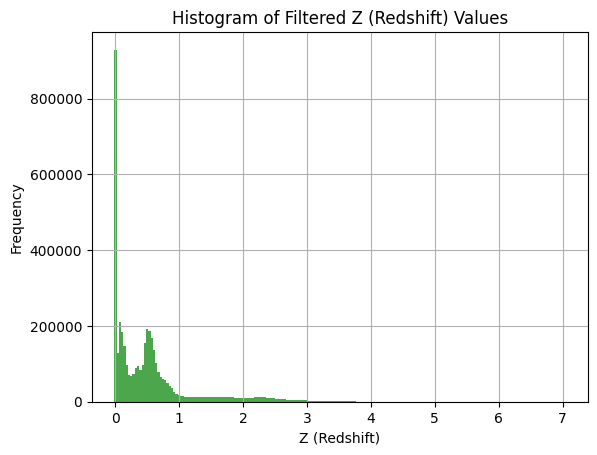

In [40]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(filtered_z_values, bins=200, color='green', alpha=0.7)
plt.title('Histogram of Filtered Z (Redshift) Values')
plt.xlabel('Z (Redshift)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [39]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

# Assume you have an array of Z values (filtered_z_values) from previous steps

# Fit the data to an exponential distribution
loc, scale = expon.fit(filtered_z_values, floc=0)

# Create a range of values (x) for plotting the PDF
xmin, xmax = filtered_z_values.min(), filtered_z_values.max()
x = np.linspace(xmin, xmax, 100)

# Calculate the PDF of the exponential distribution
pdf_exponential = expon.pdf(x, loc, scale)

# Plot the histogram and the PDF of the exponential distribution
plt.figure(figsize=(10, 6))
plt.hist(filtered_z_values, bins=200, density=True, alpha=0.6, color='g', label='Data')
plt.plot(x, pdf_exponential, 'k', linewidth=2, label='Exponential fit')
plt.title('Fit to Exponential Distribution')
plt.xlabel('Z (Redshift)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'expon' requires that 0 < (x - loc)/scale  < inf for each x in `data`.